In [1]:
import data_loader as datal
import main_rules as mod
import numpy as np


# Загрузка данных
file_path = 'ds_salaries.csv'
data = datal.load_data_csv(file_path)



Данные успешно загружены.


In [2]:
# Просмотр количества пустых значений (в датафрейме нет пустых)
mod.null_data(data)

index_series          0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [3]:
# Добавление пустых значений
data.loc[607] = [7, 2020,np.nan,np.nan, np.nan, np.nan, np.nan, np.nan, 'DE',0, 'DE', np.nan]
data.iloc[2:4, 0:3] = np.nan
data.iloc[7:9, 6:10] = np.nan

# Просмотр количества пустых значений
mod.null_data(data)

index_series          2
work_year             2
experience_level      3
employment_type       1
job_title             1
salary                1
salary_currency       3
salary_in_usd         3
employee_residence    2
remote_ratio          2
company_location      0
company_size          1
dtype: int64

In [6]:
# Статистика пустых значений по 'salary_currency' (сами строки с пустыми значениями и доля пустых)
mod.null_data_report(data['salary_currency'])

Пропущенные значения: 
     index_series  work_year experience_level employment_type  \
7             7.0     2020.0               MI              FT   
8             8.0     2020.0               MI              FT   
607           7.0     2020.0              NaN             NaN   

                 job_title      salary salary_currency  salary_in_usd  \
7           Data Scientist  11000000.0             NaN            NaN   
8    Business Data Analyst    135000.0             NaN            NaN   
607                    NaN         NaN             NaN            NaN   

    employee_residence  remote_ratio company_location company_size  
7                  NaN           NaN               HU            L  
8                  NaN           NaN               US            L  
607                 DE           0.0               DE          NaN  
Доля пропущенных значений в данных: 0.004934210526315789


In [7]:
# Статистика пустых значений по 'salary_in_usd' (сами строки с пустыми значениями и доля пустых)
mod.null_data_report(data['salary_in_usd'])

Пропущенные значения: 
     index_series  work_year experience_level employment_type  \
7             7.0     2020.0               MI              FT   
8             8.0     2020.0               MI              FT   
607           7.0     2020.0              NaN             NaN   

                 job_title      salary salary_currency  salary_in_usd  \
7           Data Scientist  11000000.0             NaN            NaN   
8    Business Data Analyst    135000.0             NaN            NaN   
607                    NaN         NaN             NaN            NaN   

    employee_residence  remote_ratio company_location company_size  
7                  NaN           NaN               HU            L  
8                  NaN           NaN               US            L  
607                 DE           0.0               DE          NaN  
Доля пропущенных значений в данных: 0.004934210526315789


In [12]:
# замена пустых заначений 
mod.null_data_fill(data['salary_in_usd'])
mod.null_data_fill(data['salary'], 'median')
mod.null_data_fill(data['salary_currency'])

# Просмотр количества пустых значений
mod.null_data(data)

index_series          2
work_year             2
experience_level      3
employment_type       1
job_title             1
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    2
remote_ratio          2
company_location      0
company_size          1
dtype: int64

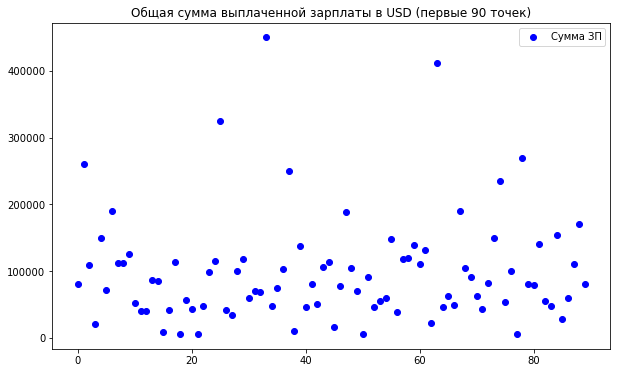

In [9]:
mod.scatter_data(data['salary_in_usd'])

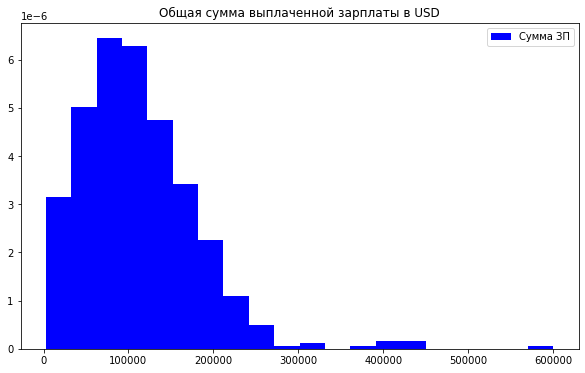

In [10]:
mod.hist_data(data['salary_in_usd'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


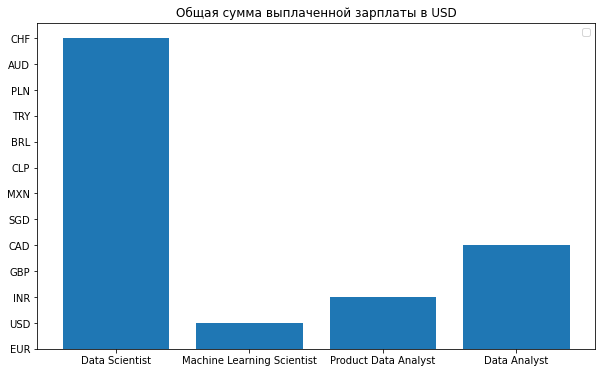

In [11]:
filtered_data = data[data['job_title'].isin(['Data Scientist','Data Analyst','Product Data Analyst', 'Machine Learning Scientist'])]
mod.bar_data(filtered_data['job_title'],filtered_data['salary_currency'])